In [2]:
import pandas as pd
import numpy as np

#Dataset Split
from sklearn.model_selection import train_test_split

#Logistics regression
from sklearn.linear_model import LogisticRegression

#Scoring system and randomisd search
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.model_selection import RandomizedSearchCV

#Random Forest model
from sklearn.ensemble import RandomForestClassifier

#LSTM
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
cbow = pd.read_csv('data_cleaned_3.csv')
#tfidf = pd.read_csv('data_cleaned.csv')
df = pd.read_csv('fake_job_postings.csv')

In [4]:
cbow_X = cbow.drop(['fraudulent', 'job_id'], axis=1)
cbow_y = cbow.loc[:, 'fraudulent']
'''
tfidf_X = tfidf.drop('fraudulent', axis=1)
tfidf_y = tfidf.loc[:, 'fraudulent']
'''
def split_data(testsize, valsize, X, y):
    #split test dataset
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=valsize,
                                                          stratify=y,
                                                        random_state=20)
    print(X_temp.shape, y_temp.shape)
    #split validation and training set
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=testsize,
                                                      stratify=y_temp,
                                                      random_state=20)
    return X_train, X_val, y_train, y_val, X_test, y_test

#We will experiment with 80-20 rule for all 3 types of dataset first
X_train_C, X_val_C, y_train_C, y_val_C, X_test_C, y_test_C = split_data(0.2, 0.2, cbow_X, cbow_y)
#X_train_t, X_val_t, y_train_t, y_val_t, X_test_t, y_test_t = split_data(0.2, 0.2, tfidf_X, tfidf_y)

(14304, 14816) (14304,)


# Oversampling

<Axes: xlabel='fraudulent'>

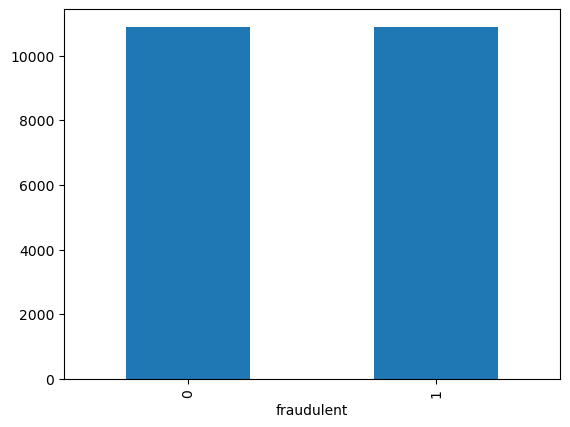

In [6]:
from imblearn.over_sampling import SMOTE
smote_enn =  SMOTE(random_state=42)
X_resampled_N, y_resampled_N = smote_enn.fit_resample(X_train_C, y_train_C)
y_resampled_N.value_counts().plot(kind='bar')

# Under sampling

<Axes: xlabel='fraudulent'>

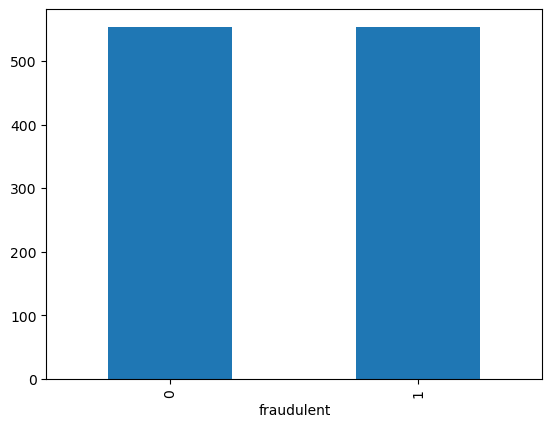

In [8]:
from imblearn.under_sampling import RandomUnderSampler
smt = RandomUnderSampler(random_state=42)
X_resampled_K, y_resampled_K = smt.fit_resample(X_train_C, y_train_C)
y_resampled_K.value_counts().plot(kind='bar')

In [10]:
def get_accuracy(y_val, y_pred, get_classification=False):
    '''
    Function: get roc_auc_score and average precision score
    input: y_val -> represent the ground truth
            y_pred -> represent the predicted values from model
    Output: None
    '''
    precision, recall, _ = precision_recall_curve(y_val, y_pred)
    auprc = auc(recall, precision)
    
    accuracy_norm = roc_auc_score(y_val, y_pred)
    print(f'roc_score: {accuracy_norm}')
    print("auprc:", auprc)
    if get_classification:
        print('classification_report')
        print(classification_report(y_val, y_pred))

    return

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
def logistics_regres(X_train, y_train, X_val, y_val, X_test, y_test):
    log_mod = LogisticRegression(random_state=20)
    log_mod.fit(X_train, y_train)
    
    print('predict val variables taking probability of target=1')
    prediction = log_mod.predict_proba(X_val)
    accuracy = get_accuracy(y_val, prediction[:,1])
    
    print('\n predict test variables')
    prediction1 = log_mod.predict_proba(X_test)
    accuracy1 = get_accuracy(y_test, prediction1[:,1])
    
    return prediction, accuracy, prediction1, accuracy1

logistics_regres(X_train_C,y_train_C, X_val_C, y_val_C, X_test_C, y_test_C)

print('with Over sampling')
logistics_regres(X_resampled_N,y_resampled_N, X_val_C, y_val_C, X_test_C, y_test_C)


print('with under sampling')
logistics_regres(X_resampled_K,y_resampled_K, X_val_C, y_val_C, X_test_C, y_test_C)

C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


predict val variables taking probability of target=1
roc_score: 0.8715740119146416
auprc: 0.3154647215145352

 predict test variables
roc_score: 0.8617999419077691
auprc: 0.23273045454686256

 predict max probability
roc_score: 0.5388462067641778
auprc: 0.3426939713698258
classification_report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       0.56      0.08      0.14       173

    accuracy                           0.95      3576
   macro avg       0.76      0.54      0.56      3576
weighted avg       0.94      0.95      0.94      3576

with Over sampling


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


predict val variables taking probability of target=1
roc_score: 0.8752557102003923
auprc: 0.2501977068325145

 predict test variables
roc_score: 0.8850130537658883
auprc: 0.24210058450661476

 predict max probability
roc_score: 0.8059812915839305
auprc: 0.48940273502834275
classification_report
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      3403
           1       0.20      0.76      0.32       173

    accuracy                           0.84      3576
   macro avg       0.60      0.81      0.62      3576
weighted avg       0.95      0.84      0.88      3576

with under sampling


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


predict val variables taking probability of target=1
roc_score: 0.9049022354489662
auprc: 0.30959524529392396

 predict test variables
roc_score: 0.8972735719417922
auprc: 0.2715275241361601

 predict max probability
roc_score: 0.8306755854660712
auprc: 0.5249771893472445
classification_report
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      3403
           1       0.18      0.87      0.29       173

    accuracy                           0.80      3576
   macro avg       0.58      0.83      0.59      3576
weighted avg       0.95      0.80      0.85      3576



(array([[9.90968369e-01, 9.03163113e-03],
        [9.52292281e-01, 4.77077190e-02],
        [3.96793918e-01, 6.03206082e-01],
        ...,
        [5.94704239e-01, 4.05295761e-01],
        [9.99338408e-01, 6.61592312e-04],
        [8.02811646e-01, 1.97188354e-01]]),
 None,
 array([[9.49856965e-01, 5.01430346e-02],
        [9.99510835e-01, 4.89165219e-04],
        [8.84511034e-01, 1.15488966e-01],
        ...,
        [3.42514143e-01, 6.57485857e-01],
        [6.67050358e-01, 3.32949642e-01],
        [9.99988567e-01, 1.14325550e-05]]),
 None)

# Hyperparameter Tuning for random forest

In [ ]:
rs_space={'max_depth': [None, 10, 20] ,
              'n_estimators': [1000, 1500],
              'max_features': ['sqrt', None],
              'criterion':['gini', 'log_loss'],
              'min_samples_leaf': [2, 5, 10],
              'min_samples_split': [2,4]
          }

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train_C, y_train_C)

print(f'Best random search hyperparameters are: {(model_random.best_params_)}')
print(f'Best random search score is: {(model_random.best_score_)}')

C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 144 is smaller than n_iter=500. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [18]:
rnd_clf = RandomForestClassifier(n_estimators=3000, max_features='sqrt', min_samples_leaf=1, max_depth=None)
print('base model')
# Fit the model on the training data
rnd_clf.fit(X_train_C, y_train_C)

print('validation with predict_proba')
# Predict probabilities on the validation set
y_pred = rnd_clf.predict_proba(X_val_C)
get_accuracy(y_val_C,  y_pred[:, 1])

print('\n test set')

print('test with predict_proba')
y_pred = rnd_clf.predict_proba(X_test_C)
get_accuracy(y_test_C,  y_pred[:, 1])


print('\n over sampling')
rnd_clf = RandomForestClassifier(n_estimators=3000, max_features='sqrt', min_samples_leaf=1, max_depth=None)
rnd_clf.fit(X_resampled_N,y_resampled_N)
print(f'validation set')
print('predict probab')
y_pred = rnd_clf.predict_proba(X_val_C)
get_accuracy(y_val_C,  y_pred[:, 1])


print('test set')
y_pred = rnd_clf.predict_proba(X_test_C)
get_accuracy(y_test_C,  y_pred[:, 1])


print('\n under sampling')
rnd_clf = RandomForestClassifier(n_estimators=3000, max_features='sqrt', min_samples_leaf=1, max_depth=None)
rnd_clf.fit(X_resampled_K,y_resampled_K)

print('validation set')
print('predict_proba')
y_pred = rnd_clf.predict_proba(X_val_C)
get_accuracy(y_val_C,  y_pred[:, 1])

print('\n test set')
print('predict_proba')
y_pred = rnd_clf.predict_proba(X_test_C)
get_accuracy(y_test_C,  y_pred[:, 1])

base model
validation with predict_proba
roc_score: 0.9925097394531105
auprc: 0.9356573633393366

 test set
test with predict_proba
roc_score: 0.9921813292929226
auprc: 0.9446271164724297

 over sampling
validation set
predict probab
roc_score: 0.994281870609317
auprc: 0.9363048426190118
test set
roc_score: 0.9922798482807587
auprc: 0.9353031400175155

 under sampling
validation set
predict_proba
roc_score: 0.9824676629012734
auprc: 0.8226660153812271

 test set
predict_proba
roc_score: 0.9820559553878846
auprc: 0.8360512785201666


# LSTM model

In [19]:
batch_size = 30
def get_loader(df_train_transformed_dropped, y_train, df_val_transformed_dropped, y_val, df_test_transformed_dropped, y_test):
    train_data = TensorDataset(torch.from_numpy(df_train_transformed_dropped.values.astype(np.float32)), torch.from_numpy(y_train.values.astype(np.float32)))
    val_data = TensorDataset(torch.from_numpy(df_val_transformed_dropped.values.astype(np.float32)), torch.from_numpy(y_val.values.astype(np.float32)))
    test_data = TensorDataset(torch.from_numpy(df_test_transformed_dropped.values.astype(np.float32)), torch.from_numpy(y_test.values.astype(np.float32)))
    
    # make sure to SHUFFLE your data
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
    val_loader = DataLoader(val_data, shuffle=False, batch_size=batch_size, drop_last=True)
    test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size, drop_last=True)
    return train_data, val_data, test_data, train_loader, val_loader, test_loader

t_train, t_val, t_test, t_trainloader, t_vallaoder, t_testloader = get_loader(X_train_C, y_train_C, X_val_C, y_val_C, X_test_C, y_test_C)

#t_train_N, t_val_N, t_test_N, t_trainloader_N, t_vallaoder_N, t_testloader_N = get_loader(X_resampled_N, y_resampled_N, X_val_C, y_val_C, X_test_C, y_test_C)

#t_train_K, t_val_K, t_test_K, t_trainloader_K, t_vallaoder_K, t_testloader_K = get_loader(X_resampled_K, y_resampled_K, X_val_C, y_val_C, X_test_C, y_test_C)

In [20]:
class LSTM(nn.Module):
    def __init__(self, layers,hidden_dim,embedding_dim):
        super(LSTM,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = layers
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=layers, batch_first=True)

        self.dropout = nn.Dropout(0.05)

        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self,x,hidden):
        batch_size = x.size(0)
        lstm_out, hidden = self.lstm(x.unsqueeze(1), hidden)
        lstm_out = self.dropout(lstm_out)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        out = self.fc(lstm_out)

        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] 
        return sig_out, hidden
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [21]:
# Check cuda status
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [22]:
layers = 2
embedding_dim = t_train.tensors[0].shape[1]
output_dim = 1
hidden_dim = 128

model = LSTM(layers,hidden_dim,embedding_dim)
model.to(device)
print(model)

LSTM(
  (lstm): LSTM(14816, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [23]:
from sklearn.metrics import recall_score
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

# function to predict accuracy
def acc(pred,label):
    '''
    try:
        print(f'roc_auc score is {roc_auc_score(label.squeeze(), pred.squeeze())}')
        print("Test Average Precision:", average_precision_score(label.squeeze(), pred.squeeze()))
    except Exception as e:
        print(f"An error occurred: {e}")
    '''
    pred = torch.round(pred.squeeze())
    #recall_score(label.squeeze(), pred)
    precision, recall, _ = precision_recall_curve(label.detach().cpu().numpy(), pred.detach().cpu().numpy())
    auprc = auc(recall, precision)
    return auprc

In [24]:
# set the gradient clipping threshold and number of training epochs
clip = 5
epochs = 10
#t_testloader

def training(train_loader, val_loader):
    # Initialize the minimum validation loss as positive infinity
    valid_loss_min = np.Inf
    
    epoch_tr_loss,epoch_vl_loss = [],[]
    epoch_tr_acc,epoch_vl_acc = [],[]
    
    for epoch in range(epochs):
        train_losses = []
        train_acc = 0.0
        train_samples = 0
        # set the model to training mode
        model.train()
        # initialize hidden state
        h = model.init_hidden(batch_size)
        for inputs, labels in train_loader:
    
            inputs, labels = inputs.to(device), labels.to(device)
            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            h = tuple([each.data for each in h])
    
            # Clear the gradients
            model.zero_grad()
            # Perform a forward pass through the model
            output,h = model(inputs,h)
    
            # calculate the loss and perform backpropogation
            loss = criterion(output.squeeze(), labels.float())
            loss.backward()
            train_losses.append(loss.item())
    
            # calculating accuracy
            accuracy = acc(output,labels)
            train_acc += accuracy
            train_samples += 1
            # Gradient Clipping: `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(model.parameters(), clip)
            # Optimizer Step: Update the model's parameters using the optimizer
            optimizer.step()

        # validation
        # Set Model to Evaluation Mode
        model.eval()
        # Initialize Hidden States
        val_h = model.init_hidden(batch_size)
        val_losses = []
        val_acc = 0.0
        val_samples = 0
        # Loop Through Test Data
        for inputs, labels in val_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)
            # Forward Pass
            output, val_h = model(inputs, val_h)

            # Calculate Loss and Metrics(Accuracy)
            val_loss = criterion(output.squeeze(), labels.float())
            val_losses.append(val_loss.item())
            accuracy = acc(output,labels)
            val_acc += accuracy
            val_samples += 1
    
        epoch_train_loss = np.mean(train_losses)
        epoch_val_loss = np.mean(val_losses)
        # Aggregate Metrics
        epoch_train_acc = train_acc/train_samples
        epoch_val_acc = val_acc/val_samples
        epoch_tr_loss.append(epoch_train_loss)
        epoch_vl_loss.append(epoch_val_loss)
        epoch_tr_acc.append(epoch_train_acc)
        epoch_vl_acc.append(epoch_val_acc)
        print(f'Epoch {epoch+1}')
        print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
        print(f'Train AUPRC Score : {epoch_train_acc*100} val AUPRC Score : {epoch_val_acc*100}')

In [25]:
print('normal data')
training(t_trainloader, t_vallaoder)

#print('\n SMOTE')
#training(t_trainloader_N, t_vallaoder_N)

#print('\n Undersampling')
#training(t_trainloader_K, t_vallaoder_K)

normal data


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

Epoch 1
train_loss : 0.1857911128369881 val_loss : 0.16881818249821662
Train AUPRC Score : 52.42344706911648 val AUPRC Score : 52.42105263157894


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

Epoch 2
train_loss : 0.15175484432508862 val_loss : 0.13845524795745548
Train AUPRC Score : 54.66972878390218 val AUPRC Score : 55.07017543859647


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

Epoch 3
train_loss : 0.13853625275116424 val_loss : 0.14919702612647884
Train AUPRC Score : 58.70641169853783 val AUPRC Score : 57.42105263157892


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

Epoch 4
train_loss : 0.13116352120536598 val_loss : 0.11696769472603735
Train AUPRC Score : 60.02624671916027 val AUPRC Score : 62.991228070175396


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

Epoch 5
train_loss : 0.10496004704346885 val_loss : 0.1054747643929563
Train AUPRC Score : 63.34645669291349 val AUPRC Score : 66.08771929824556


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

Epoch 6
train_loss : 0.09139398368670705 val_loss : 0.11357993236987998
Train AUPRC Score : 67.03037120359969 val AUPRC Score : 61.771929824561376


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

Epoch 7
train_loss : 0.07926844148175531 val_loss : 0.1501245165292762
Train AUPRC Score : 71.17235345581813 val AUPRC Score : 62.57894736842101


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

Epoch 8
train_loss : 0.06353963382958906 val_loss : 0.10228406157050478
Train AUPRC Score : 75.39151356080502 val AUPRC Score : 69.18421052631574


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

Epoch 9
train_loss : 0.0658283949618196 val_loss : 0.10082134421130544
Train AUPRC Score : 75.11154855643053 val AUPRC Score : 67.53508771929822


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

Epoch 10
train_loss : 0.06315461040898886 val_loss : 0.10336629398363201
Train AUPRC Score : 76.17016622922144 val AUPRC Score : 69.59649122807015


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [26]:
def evaluate_model(model, dataloader, device):
    model.eval()
    test_acc = 0.0
    test_losses=[]
    test_count = 0
    val_h = model.init_hidden(batch_size)
    with torch.no_grad():
        for inputs, labels in dataloader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)
            # Forward Pass
            output, val_h = model(inputs, val_h)

            # Calculate Loss and Metrics(Accuracy)
            test_loss = criterion(output.squeeze(), labels.float())
            test_losses.append(test_loss.item())
            
            #print(output, labels)
            accuracy = acc(output,labels)
            test_acc += accuracy
            test_count += 1
            
    #print(test_losses)
    test_loss = np.mean(test_losses)
    # Aggregate Metrics
    test_acc = test_acc/test_count
    print(f'test_loss : {test_loss} ')
    print(f'Test AUPRC score : {test_acc*100}')

evaluate_model(model, t_testloader, device)

C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarn

test_loss : 0.0901383496908972 
Test AUPRC score : 72.20588235294116
